In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
dataset=pd.read_csv('CLV.csv')
dataset


,INCOME,SPEND
0,233,150
1,250,187
2,204,172
3,236,178
4,354,163
5,192,148
6,294,153
7,263,173
8,199,162
9,168,174


In [2]:
#Plot styling
import seaborn as sns; sns.set()  
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0,'Income / spend')

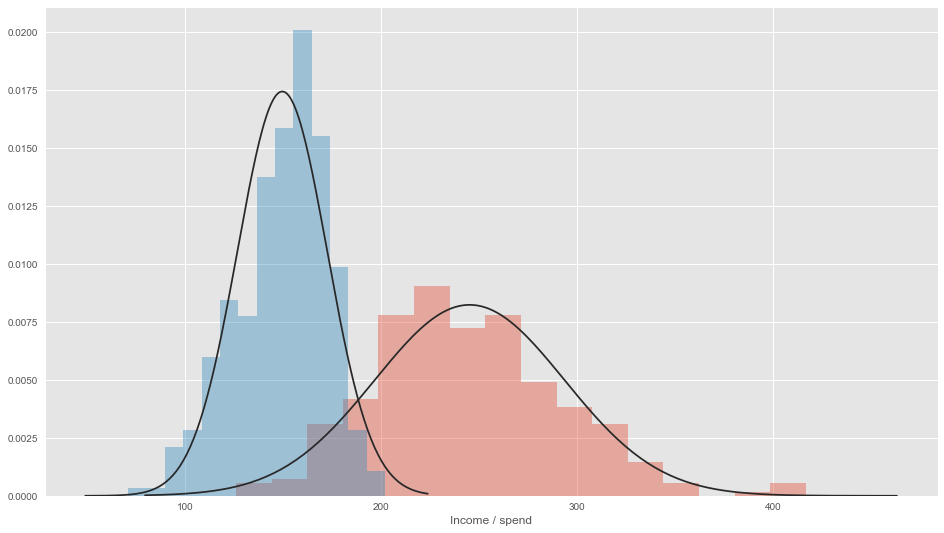

In [8]:
#Visualising the data
from scipy.stats import norm
plot_income = sns.distplot(dataset["INCOME"], fit=norm, kde=False)
plot_spend = sns.distplot(dataset["SPEND"], fit=norm, kde=False)
plt.xlabel('Income / spend')

In [9]:
X=dataset.iloc[:,[0,1]].values
#Elbow method
from sklearn.cluster import KMeans
wcss = []

for i in range(1,11):
 km=KMeans(n_clusters=i,init='k-means++', max_iter=300,n_init=10,random_state=0)
 km.fit(X)
 wcss.append(km.inertia_)

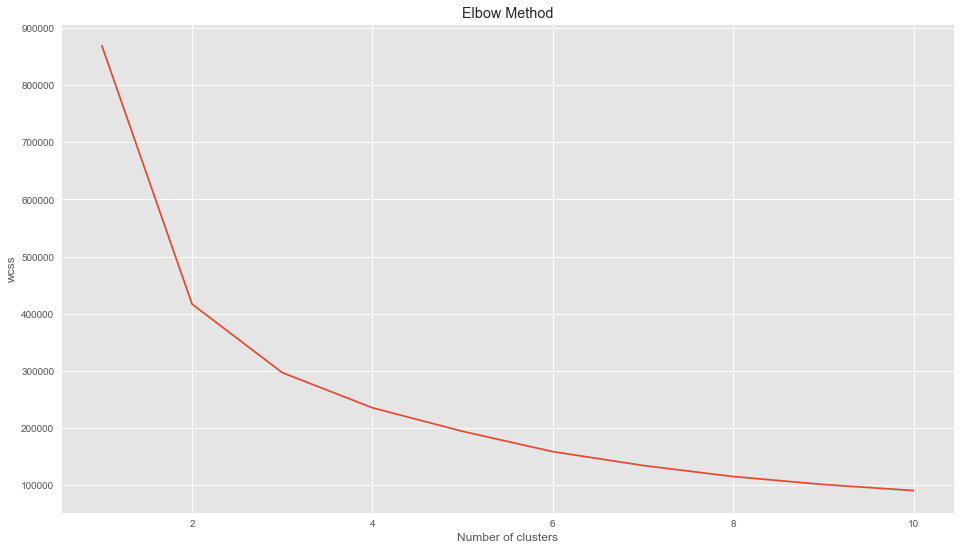

In [10]:
#ploting
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [11]:
##Fitting kmeans to the dataset with K=4

km4=KMeans(n_clusters=4,init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km4.fit_predict(X)

No handles with labels found to put in legend.


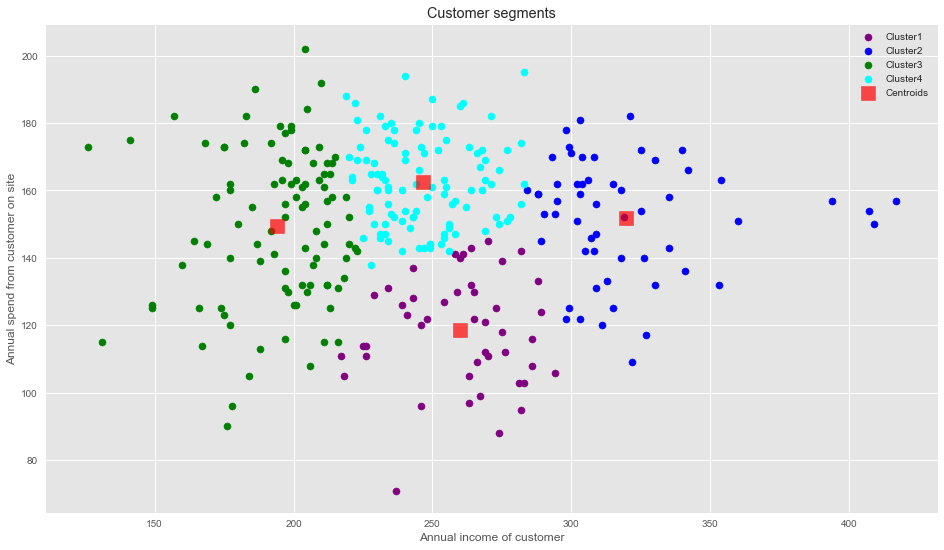

In [17]:
plt.title('Customer segments')
plt.xlabel('Annual income of customer')
plt.ylabel('Annual spend from customer on site')
plt.legend()
arr1 = plt.scatter(X[y_means==0,0],X[y_means==0,1],s=50, c='purple',label='Cluster1')
arr2 = plt.scatter(X[y_means==1,0],X[y_means==1,1],s=50, c='blue',label='Cluster2')
arr3 = plt.scatter(X[y_means==2,0],X[y_means==2,1],s=50, c='green',label='Cluster3')
arr4 = plt.scatter(X[y_means==3,0],X[y_means==3,1],s=50, c='cyan',label='Cluster4')

arr5 = plt.scatter(km4.cluster_centers_[:,0], km4.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
plt.legend([arr1, arr2, arr3, arr4, arr5], ['Cluster1','Cluster2','Cluster3','Cluster4', 'Centroids'])
plt.show()